# DATASET INFORMATION

<img src="Questions\1.%20Dataset%20Details.png" alt="Dataset Details" width="300"/>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## PROBLEM 1

<img src="Questions/1.png" alt="Dataset Details" width="400"/>

### SOLUTION

In [78]:
#Reading dataset
df=pd.read_csv(r'Dataset/startup_funding.csv')

In [79]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [80]:
df.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
       'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', nan, 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
       'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
       'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
       'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'Bangalore / San Mateo',
       'New York/ India', 'US/India', 'Gurgaon / SFO', 'Bangalore / USA',
       'New Delhi/ Houston', 'Nagpur', 'Mumbai

In [81]:
#cleaning dataset

#fixing bangalore
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Bangalore/ Bangkok','CityLocation']='Bangalore'
df.loc[df.CityLocation=='SFO / Bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Seattle / Bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Bangalore / SFO','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Bangalore / Palo Alto','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Bangalore / San Mateo','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Bangalore / USA','CityLocation']='Bangalore'


#fixing New Delhi
df.loc[df.CityLocation=='Delhi','CityLocation']='New Delhi'
df.loc[df.CityLocation=='New Delhi / US','CityLocation']='New Delhi'
df.loc[df.CityLocation=='New Delhi/ Houston','CityLocation']='New Delhi'
df.loc[df.CityLocation=='New Delhi / California','CityLocation']='New Delhi'

#fixing Mumbai
df.loc[df.CityLocation=='Mumbai / UK','CityLocation']='Mumbai'
df.loc[df.CityLocation=='Mumbai / NY','CityLocation']='Mumbai'
df.loc[df.CityLocation=='Mumbai / Global','CityLocation']='Mumbai'

#fixing Noida
df.loc[df.CityLocation=='Noida / Singapore','CityLocation']='Noida'

#fixing Gurgaon
df.loc[df.CityLocation=='Gurgaon / SFO','CityLocation']='Gurgaon'

#Dropping null rows in CityLocation
df.drop(df[df.CityLocation.isnull()].index,inplace=True)

In [82]:
df.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'London', 'Pune/Seattle',
       'Pune / Dubai', 'Varanasi', 'Bhopal', 'Jodhpur', 'Hyderabad/USA',
       'Boston', 'USA/India', 'Goa/Hyderabad', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'New York/ India',
       'US/India', 'Nagpur', 'India / US', 'Udaipur',
       'Dallas / Hyderabad'], dtype=object)

In [83]:
#comparing the cities for funding by creating a resultant dataframe
CityNames=['Bangalore','Mumbai','New Delhi','Gurgaon','Noida']
FundingReceived=[]
for i in CityNames:
    FundingReceived.append(len(df[df.CityLocation==i]))
res_df=pd.DataFrame({'City':CityNames,'FundingReceived':FundingReceived})

In [84]:
res_df

,City,FundingReceived
0,Bangalore,637
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


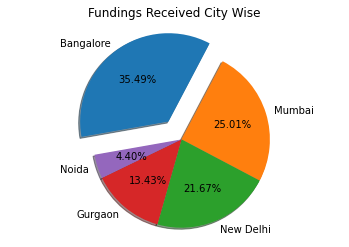

In [92]:
#plotting a pie chart for a better visualization
explode=[0.3,0,0,0,0]
plt.pie(FundingReceived,labels=CityNames,counterclock=False,startangle=190,autopct='%.2f%%',shadow=True,radius=1.2,
        explode=explode)
plt.title('Fundings Received City Wise')
plt.axis('equal')
plt.show()

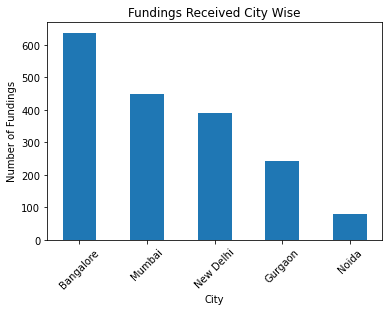

In [87]:
#plotting a bar graph to compare frequencies of investors
plt.bar(CityNames,FundingReceived,width=0.5)
plt.title('Fundings Received City Wise')
plt.xlabel('''City''')
plt.ylabel('Number of Fundings')
plt.xticks(rotation=45)
plt.show()


In [43]:
#ANS
print('''The city in which startups received maximum number of funding among the following:-
1.Bangalore
2.Mumbai
3.New Delhi
4.Gurgaon
5.Noida''')
print('is',res_df.loc[0,'City'])

The city in which startups received maximum number of funding among the following:-
1.Bangalore
2.Mumbai
3.New Delhi
4.Gurgaon
5.Noida
is Bangalore


## PROBLEM 2

<img src="Questions/2.png" alt="Dataset Details" width="400"/>

### SOLUTION

In [60]:
#Reading dataset
df=pd.read_csv(r'Dataset/startup_funding.csv')

In [61]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [62]:
#Dropping rows where InvestorsName is Null
df.drop(df[df.InvestorsName.isnull()].index,inplace=True)

In [63]:
for i in df.InvestorsName.unique():
    print(i)

Kae Capital
Triton Investment Advisors
Kashyap Deorah, Anand Sankeshwar, Deepak Jain, Sadashiva NT, Arjun Mehta, Satish Kaul, Anindya Ghose
Kunal Shah, LetsVenture, Anupam Mittal, Hetal Sonpal
Narottam Thudi, Shireesh Palle
Reliance Corporate Advisory Services Ltd
Infuse Ventures, JLL
Asset Management (Asia) Ltd, Digital Garage Inc
Kalaari Capital, Nexus India Capital Advisors
International Finance Corporation, Rocketship, Accel Partners, Jungle Ventures, Shailesh Rao, Venture Highway
BCCL
Blume Ventures, Contrarian Capital India Partners, Emergent Ventures India, Pallav Nadhani, Ashish Gupta, Sharad Sharma, Sirion Labs
India Quotient, Shunwei Capital
Sreeram Iyer, Suvo Sarkar, Anita Gupta, Likemind Ventures
Mitsui & Co.
Dunamis Ventures Pte Ltd
Venture Catalysts, Sourav Ganguly, Ankit Aditya, Moksh Sports Ventures
Fireside Ventures, Apurva Salarpuria, Sidharth Pansari, Sprout Capital
SBI-FMO Fund, Bessemer Venture Partners, Catamaran Ventures
Corvus Ventures, MAPE Advisory Group
500 S

In [64]:
#Removing Undisclosed Investors
def RemoveUndisclosed(s):
    l=['other undisclosed investors','Other undisclosed investors','Undisclosed Investors','Undisclosed investors'
          ,'undisclosed investors']
    for i in l:
        if s.__contains__(i):
            return s.replace(i,'')
    return s
df.InvestorsName=df.InvestorsName.apply(RemoveUndisclosed)
            
            
            
            
        

In [65]:
for i in df.InvestorsName.unique():
    print(i)

Kae Capital
Triton Investment Advisors
Kashyap Deorah, Anand Sankeshwar, Deepak Jain, Sadashiva NT, Arjun Mehta, Satish Kaul, Anindya Ghose
Kunal Shah, LetsVenture, Anupam Mittal, Hetal Sonpal
Narottam Thudi, Shireesh Palle
Reliance Corporate Advisory Services Ltd
Infuse Ventures, JLL
Asset Management (Asia) Ltd, Digital Garage Inc
Kalaari Capital, Nexus India Capital Advisors
International Finance Corporation, Rocketship, Accel Partners, Jungle Ventures, Shailesh Rao, Venture Highway
BCCL
Blume Ventures, Contrarian Capital India Partners, Emergent Ventures India, Pallav Nadhani, Ashish Gupta, Sharad Sharma, Sirion Labs
India Quotient, Shunwei Capital
Sreeram Iyer, Suvo Sarkar, Anita Gupta, Likemind Ventures
Mitsui & Co.
Dunamis Ventures Pte Ltd
Venture Catalysts, Sourav Ganguly, Ankit Aditya, Moksh Sports Ventures
Fireside Ventures, Apurva Salarpuria, Sidharth Pansari, Sprout Capital
SBI-FMO Fund, Bessemer Venture Partners, Catamaran Ventures
Corvus Ventures, MAPE Advisory Group
500 S

In [66]:
def InvestorsFreq(df):
    d={}
    investors=df.InvestorsName.unique()
    for i in investors:
        freq=len(df[df.InvestorsName==i])
        t=i.split(',')
        for j in t:
            if j!=' ' and j!='':
                temp=j.strip()
                d[temp]=d.get(temp,0)+freq
    
    res_df=pd.DataFrame(list(d.items()))
    res_df.columns=['Investors Name','Number of times Invested']
    res_df.sort_values(by='Number of times Invested',ascending=False,inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df
    
res_df=InvestorsFreq(df)

In [67]:
res_df.head()

,Investors Name,Number of times Invested
0,Sequoia Capital,64
1,Accel Partners,53
2,Kalaari Capital,44
3,SAIF Partners,41
4,Indian Angel Network,40


In [71]:
investorsTop5=res_df.loc[[i for i in range(5)],'Investors Name']
investedFrequency=res_df.loc[[i for i in range(5)],'Number of times Invested']

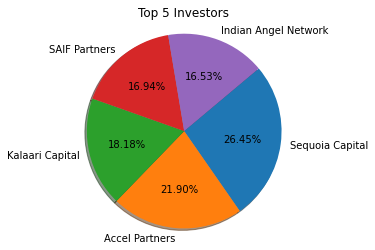

In [89]:
#plotting a pie chart to compare investing frequency of different investors
plt.pie(investedFrequency,labels=investorsTop5,counterclock=False,startangle=40,autopct='%.2f%%',shadow=True)
plt.title('Top 5 Investors')
plt.axis('equal')
plt.show()

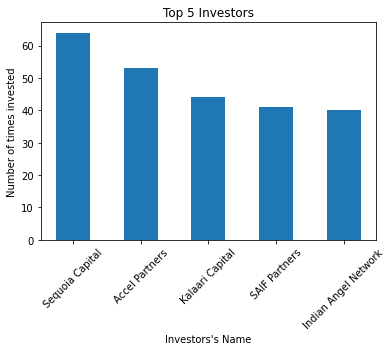

In [77]:
#plotting a bar graph to compare frequencies of investors
plt.bar(investorsTop5,investedFrequency,width=0.5)
plt.title('Top 5 Investors')
plt.xlabel('''Investors's Name''')
plt.ylabel('Number of times invested')
plt.xticks(rotation=45)
plt.show()


## PROBLEM 3

<img src="Questions/3.png" alt="Dataset Details" width="400"/>

### SOLUTION

In [40]:
#Reading dataset
df=pd.read_csv(r'Dataset/startup_funding.csv')

In [41]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [42]:
#Dropping rows where InvestorsName and StartupName is Null
df.drop(df[df.InvestorsName.isnull() | df.StartupName.isnull()].index,inplace=True)

In [43]:
#Removing Undisclosed Investors
def RemoveUndisclosed(s):
    l=['other undisclosed investors','Other undisclosed investors','Undisclosed Investors','Undisclosed investors'
          ,'undisclosed investors']
    for i in l:
        if s.__contains__(i):
            return s.replace(i,'')
    return s
df.InvestorsName=df.InvestorsName.apply(RemoveUndisclosed)

In [44]:
#Correcting Names of Important Startups(Ola,Flipkart,Oyo,Paytm)

#filter for Oyo
filt1=((df.StartupName=='OYO Rooms') | (df.StartupName=='Oyo Rooms') |  (df.StartupName=='oyorooms') | 
       (df.StartupName=='Oyorooms') | (df.StartupName=='OyoRooms'))
df.loc[filt1,'StartupName']='Oyo'

#filter for Ola
filt2=((df.StartupName=='Ola Cabs') | (df.StartupName=='Olacabs'))
df.loc[filt2,'StartupName']='Ola'

#filter for Flipkart
filt3=((df.StartupName=='Flipkart.com'))
df.loc[filt3,'StartupName']='Flipkart'

#filter for Paytm
filt4=((df.StartupName=='Paytm Marketplace'))
df.loc[filt4,'StartupName']='Paytm'

for i in df.StartupName.unique():#NAMES CORRECTED
    print(i)


TouchKin
Ethinos
Leverage Edu
Zepo
Click2Clinic
Billion Loans
Ecolibriumenergy
Droom
Jumbotail
Moglix
Timesaverz
Minjar
Clip App
Upwardly.in
Autorox.co
Fabogo
Flickstree
Design Cafe
Innoviti
VDeliver
Bottr.me
Arcatron
QwikSpec
Chumbak
Increff
Vayana
MObiquest
Ambee
Ideal Insurance
Hypernova Interactive
Rentomojo
AirCTO
Playablo
Trupay
Brick2Wall
FableStreet
Monsoon Fintech
MonkeyBox
Noticeboard
Byju’s
Creator’s Gurukul
Fab Hotels
ThinkerBell
1mg
Jhakaas
BigStylist
Gympik.com
Tripeur
RentOnGo
Goomo
MaxMyWealth
Spinny
Healthbuds
Ftcash
BHIVE Workspace
wayForward
GyanDhan
Hungry Foal
ZipLoan
GrowFitter
Stratfit
Multiplier Solutions
ABI Health
Stockal
Guidoo
eSahai.in
Loanmeet
LendingKart
Boxx.ai
PeeSafe.in
Vista Rooms
CoverFox
HyperTrack
Goodera
Digit
Ola
Vanitycask
MrNeeds
MoneyTap
Goodbox
Fincash
PortDesk
EdgeFx
EazyDiner
HealthIntel
Unbxd
DarwinBox
ForeverShop
Insider.in
Fynd
Grow Fit
Fabulyst
mSwipe
OneAssist
Julia Computing
Kissht
Explore Life traveling
Loantap
Voxweb
HUG Innovations

In [45]:
def countInvestmentsByInvestors(df):
    d_investor={}#stores name of startups in which investors invested
    d_cnt={}#stores count of investments by investors
    investors=list(df.InvestorsName.unique())
    
    for i in investors:
        startup=list(df[df.InvestorsName==i].StartupName)#finding startups for investors
        split_investors=i.split(',')#splitting investors by ','
        
        for j in split_investors:
            name=j.strip()#clearing spaces from investor name
            if name!='' and name!=' ':
                if name not in d_investor:#if startup not present in dictionary add it
                    d_investor[name]=[]
                    d_cnt[name]=0
            
                for k in startup:
                    startup_name=k.strip()
                    if startup_name not in d_investor[name]:
                        d_investor[name].append(startup_name)#add each startup name in dictionary if not present earlier
                        d_cnt[name]+=1
    
    res_df=pd.DataFrame(list(d_cnt.items()))
    res_df.columns=['Investor Name','No. of times invested']
    res_df.sort_values(by='No. of times invested',ascending=False,inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df
                    
res_df=countInvestmentsByInvestors(df)
res_df.head()

,Investor Name,No. of times invested
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


In [46]:
#storing top 5 investors for plotting graph
investorsTop5=res_df.loc[[i for i in range(5)],'Investor Name']
investedFrequency=res_df.loc[[i for i in range(5)],'No. of times invested']

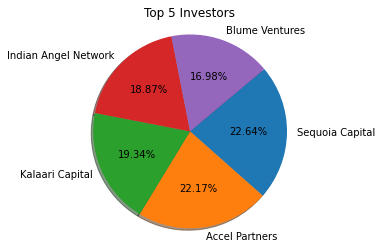

In [47]:
#plotting a pie chart to compare investing frequency of different investors
plt.pie(investedFrequency,labels=investorsTop5,counterclock=False,startangle=40,autopct='%.2f%%',shadow=True)
plt.title('Top 5 Investors')
plt.axis('equal')
plt.show()

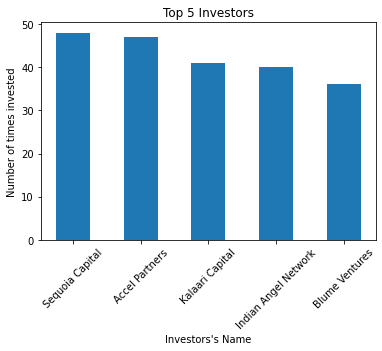

In [48]:
#plotting a bar graph to compare frequencies of investors
plt.bar(investorsTop5,investedFrequency,width=0.5)
plt.title('Top 5 Investors')
plt.xlabel('''Investors's Name''')
plt.ylabel('Number of times invested')
plt.xticks(rotation=45)
plt.show()


## PROBLEM 4

<img src="Questions/4.png" alt="Dataset Details" width="400"/>

### SOLUTION

In [75]:
#Reading dataset
df=pd.read_csv(r'Dataset/startup_funding.csv')

In [76]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [77]:
#Dropping rows where InvestorsName and StartupName is Null
df.drop(df[df.InvestorsName.isnull() | df.StartupName.isnull() | df.InvestmentType.isnull()].index,inplace=True)

In [78]:
#Removing Undisclosed Investors
def RemoveUndisclosed(s):
    l=['other undisclosed investors','Other undisclosed investors','Undisclosed Investors','Undisclosed investors'
          ,'undisclosed investors']
    for i in l:
        if s.__contains__(i):
            return s.replace(i,'')
    return s
df.InvestorsName=df.InvestorsName.apply(RemoveUndisclosed)

In [79]:
#Correcting Names of Important Startups(Ola,Flipkart,Oyo,Paytm)

#filter for Oyo
filt1=((df.StartupName=='OYO Rooms') | (df.StartupName=='Oyo Rooms') |  (df.StartupName=='oyorooms') | 
       (df.StartupName=='Oyorooms') | (df.StartupName=='OyoRooms'))
df.loc[filt1,'StartupName']='Oyo'

#filter for Ola
filt2=((df.StartupName=='Ola Cabs') | (df.StartupName=='Olacabs'))
df.loc[filt2,'StartupName']='Ola'

#filter for Flipkart
filt3=((df.StartupName=='Flipkart.com'))
df.loc[filt3,'StartupName']='Flipkart'

#filter for Paytm
filt4=((df.StartupName=='Paytm Marketplace'))
df.loc[filt4,'StartupName']='Paytm'

for i in df.StartupName.unique():#NAMES CORRECTED
    print(i)


TouchKin
Ethinos
Leverage Edu
Zepo
Click2Clinic
Billion Loans
Ecolibriumenergy
Droom
Jumbotail
Moglix
Timesaverz
Minjar
Clip App
Upwardly.in
Autorox.co
Fabogo
Flickstree
Design Cafe
Innoviti
VDeliver
Bottr.me
Arcatron
QwikSpec
Chumbak
Increff
Vayana
MObiquest
Ambee
Ideal Insurance
Hypernova Interactive
Rentomojo
AirCTO
Playablo
Trupay
Brick2Wall
FableStreet
Monsoon Fintech
MonkeyBox
Noticeboard
Byju’s
Creator’s Gurukul
Fab Hotels
ThinkerBell
1mg
Jhakaas
BigStylist
Gympik.com
Tripeur
RentOnGo
Goomo
MaxMyWealth
Spinny
Healthbuds
Ftcash
BHIVE Workspace
wayForward
GyanDhan
Hungry Foal
ZipLoan
GrowFitter
Stratfit
Multiplier Solutions
ABI Health
Stockal
Guidoo
eSahai.in
Loanmeet
LendingKart
Boxx.ai
PeeSafe.in
Vista Rooms
CoverFox
HyperTrack
Goodera
Digit
Ola
Vanitycask
MrNeeds
MoneyTap
Goodbox
Fincash
PortDesk
EdgeFx
EazyDiner
HealthIntel
Unbxd
DarwinBox
ForeverShop
Insider.in
Fynd
Grow Fit
Fabulyst
mSwipe
OneAssist
Julia Computing
Kissht
Explore Life traveling
Loantap
Voxweb
HUG Innovations

In [80]:
print(df.InvestmentType.unique())

['Private Equity' 'Seed Funding' 'Debt Funding' 'SeedFunding'
 'PrivateEquity' 'Crowd funding' 'Crowd Funding']


In [81]:
#Correcting Spelling in InvestmentType
df.loc[df.InvestmentType=='PrivateEquity','InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='SeedFunding','InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='Crowd funding','InvestmentType']='Crowd Funding'
print(df.InvestmentType.unique())

['Private Equity' 'Seed Funding' 'Debt Funding' 'Crowd Funding']


In [82]:
def countInvestmentsByInvestors(startup,investors,investmentType):
    d_investor={}#stores name of startups in which investors invested
    d_cnt={}#stores count of investments by investors
    n=len(investors)
    for i in range(n):
        if (investmentType[i]=='Crowd Funding' or investmentType[i]=='Seed Funding'):#consider only those investments which are 
                                                                                    #crowdfunding or seedfunding
                investorList=investors[i].split(',')
                startup_name=startup[i]
                for j in investorList:
                    investor_name=j.strip()
                    if investor_name!='' and investor_name!=' ':
                        if investor_name not in d_investor:
                            d_investor[investor_name]={}
                            d_cnt[investor_name]=0
                
                        if startup_name not in d_investor[investor_name]:
                            d_investor[investor_name][startup_name]=True#Adding startup name to d_investor[investor_name] dict
                            d_cnt[investor_name]+=1
    res_df=pd.DataFrame(list(d_cnt.items()))
    res_df.columns=['Investor Name','No. of times invested']
    res_df.sort_values(by='No. of times invested',ascending=False,inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df
                    
res_df=countInvestmentsByInvestors(list(df.StartupName),list(df.InvestorsName),list(df.InvestmentType))
res_df.head()

,Investor Name,No. of times invested
0,Indian Angel Network,33
1,Rajan Anandan,23
2,LetsVenture,16
3,Anupam Mittal,16
4,Group of Angel Investors,14


In [83]:
#storing top 5 investors for plotting graph
investorsTop5=res_df.loc[[i for i in range(5)],'Investor Name']
investedFrequency=res_df.loc[[i for i in range(5)],'No. of times invested']

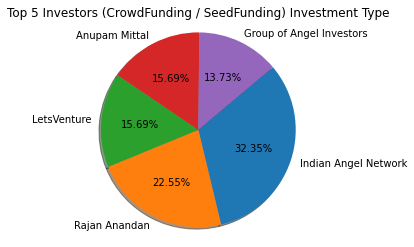

In [84]:
#plotting a pie chart to compare investing frequency of different investors
plt.pie(investedFrequency,labels=investorsTop5,counterclock=False,startangle=40,autopct='%.2f%%',shadow=True)
plt.title('Top 5 Investors (CrowdFunding / SeedFunding) Investment Type')
plt.axis('equal')
plt.show()

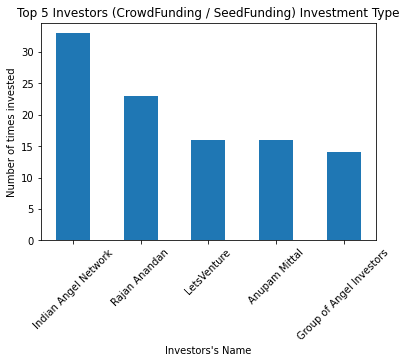

In [85]:
#plotting a bar graph to compare frequencies of investors
plt.bar(investorsTop5,investedFrequency,width=0.5)
plt.title('Top 5 Investors (CrowdFunding / SeedFunding) Investment Type')
plt.xlabel('''Investors's Name''')
plt.ylabel('Number of times invested')
plt.xticks(rotation=45)
plt.show()

## PROBLEM 5

<img src="Questions/5.png" alt="Dataset Details" width="400"/>

### SOLUTION

In [86]:
#Reading dataset
df=pd.read_csv(r'Dataset/startup_funding.csv')

In [87]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [88]:
#Dropping rows where InvestorsName and StartupName is Null
df.drop(df[df.InvestorsName.isnull() | df.StartupName.isnull() | df.InvestmentType.isnull()].index,inplace=True)

In [89]:
#Removing Undisclosed Investors
def RemoveUndisclosed(s):
    l=['other undisclosed investors','Other undisclosed investors','Undisclosed Investors','Undisclosed investors'
          ,'undisclosed investors']
    for i in l:
        if s.__contains__(i):
            return s.replace(i,'')
    return s
df.InvestorsName=df.InvestorsName.apply(RemoveUndisclosed)

In [90]:
#Correcting Names of Important Startups(Ola,Flipkart,Oyo,Paytm)

#filter for Oyo
filt1=((df.StartupName=='OYO Rooms') | (df.StartupName=='Oyo Rooms') |  (df.StartupName=='oyorooms') | 
       (df.StartupName=='Oyorooms') | (df.StartupName=='OyoRooms'))
df.loc[filt1,'StartupName']='Oyo'

#filter for Ola
filt2=((df.StartupName=='Ola Cabs') | (df.StartupName=='Olacabs'))
df.loc[filt2,'StartupName']='Ola'

#filter for Flipkart
filt3=((df.StartupName=='Flipkart.com'))
df.loc[filt3,'StartupName']='Flipkart'

#filter for Paytm
filt4=((df.StartupName=='Paytm Marketplace'))
df.loc[filt4,'StartupName']='Paytm'

for i in df.StartupName.unique():#NAMES CORRECTED
    print(i)


TouchKin
Ethinos
Leverage Edu
Zepo
Click2Clinic
Billion Loans
Ecolibriumenergy
Droom
Jumbotail
Moglix
Timesaverz
Minjar
Clip App
Upwardly.in
Autorox.co
Fabogo
Flickstree
Design Cafe
Innoviti
VDeliver
Bottr.me
Arcatron
QwikSpec
Chumbak
Increff
Vayana
MObiquest
Ambee
Ideal Insurance
Hypernova Interactive
Rentomojo
AirCTO
Playablo
Trupay
Brick2Wall
FableStreet
Monsoon Fintech
MonkeyBox
Noticeboard
Byju’s
Creator’s Gurukul
Fab Hotels
ThinkerBell
1mg
Jhakaas
BigStylist
Gympik.com
Tripeur
RentOnGo
Goomo
MaxMyWealth
Spinny
Healthbuds
Ftcash
BHIVE Workspace
wayForward
GyanDhan
Hungry Foal
ZipLoan
GrowFitter
Stratfit
Multiplier Solutions
ABI Health
Stockal
Guidoo
eSahai.in
Loanmeet
LendingKart
Boxx.ai
PeeSafe.in
Vista Rooms
CoverFox
HyperTrack
Goodera
Digit
Ola
Vanitycask
MrNeeds
MoneyTap
Goodbox
Fincash
PortDesk
EdgeFx
EazyDiner
HealthIntel
Unbxd
DarwinBox
ForeverShop
Insider.in
Fynd
Grow Fit
Fabulyst
mSwipe
OneAssist
Julia Computing
Kissht
Explore Life traveling
Loantap
Voxweb
HUG Innovations

In [91]:
print(df.InvestmentType.unique())

['Private Equity' 'Seed Funding' 'Debt Funding' 'SeedFunding'
 'PrivateEquity' 'Crowd funding' 'Crowd Funding']


In [92]:
#Correcting Spelling in InvestmentType
df.loc[df.InvestmentType=='PrivateEquity','InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='SeedFunding','InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='Crowd funding','InvestmentType']='Crowd Funding'
print(df.InvestmentType.unique())

['Private Equity' 'Seed Funding' 'Debt Funding' 'Crowd Funding']


In [93]:
def countInvestmentsByInvestors(startup,investors,investmentType):
    d_investor={}#stores name of startups in which investors invested
    d_cnt={}#stores count of investments by investors
    n=len(investors)
    for i in range(n):
        if (investmentType[i]=='Private Equity'):#consider only those investments which are Private Equity
                investorList=investors[i].split(',')
                startup_name=startup[i]
                for j in investorList:
                    investor_name=j.strip()
                    if investor_name!='' and investor_name!=' ':
                        if investor_name not in d_investor:
                            d_investor[investor_name]={}
                            d_cnt[investor_name]=0
                
                        if startup_name not in d_investor[investor_name]:
                            d_investor[investor_name][startup_name]=True#Adding startup name to d_investor[investor_name] dict
                            d_cnt[investor_name]+=1
    res_df=pd.DataFrame(list(d_cnt.items()))
    res_df.columns=['Investor Name','No. of times invested']
    res_df.sort_values(by='No. of times invested',ascending=False,inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df
                    
res_df=countInvestmentsByInvestors(list(df.StartupName),list(df.InvestorsName),list(df.InvestmentType))
res_df.head()

,Investor Name,No. of times invested
0,Sequoia Capital,45
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24


In [94]:
#storing top 5 investors for plotting graph
investorsTop5=res_df.loc[[i for i in range(5)],'Investor Name']
investedFrequency=res_df.loc[[i for i in range(5)],'No. of times invested']

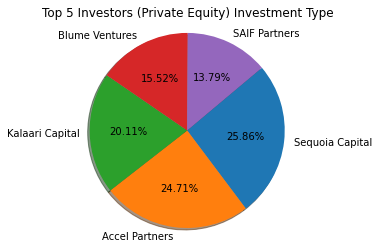

In [95]:
#plotting a pie chart to compare investing frequency of different investors
plt.pie(investedFrequency,labels=investorsTop5,counterclock=False,startangle=40,autopct='%.2f%%',shadow=True)
plt.title('Top 5 Investors (Private Equity) Investment Type')
plt.axis('equal')
plt.show()

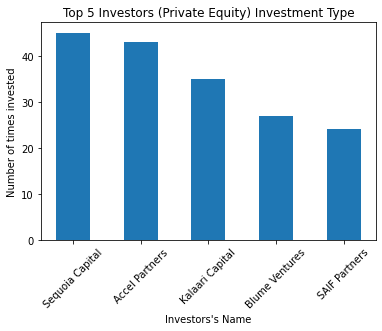

In [97]:
#plotting a bar graph to compare frequencies of investors
plt.bar(investorsTop5,investedFrequency,width=0.5)
plt.title('Top 5 Investors (Private Equity) Investment Type')
plt.xlabel('''Investors's Name''')
plt.ylabel('Number of times invested')
plt.xticks(rotation=45)
plt.show()